In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, pipeline
from sklearn.preprocessing import PolynomialFeatures

import training_models_helper as tmh
%aimport training_models_helper

tm = tmh.TrainingModelsHelper()

import transform_helper
%aimport transform_helper

th = transform_helper.Transformation_Helper()




# Normality inducing transformations

## Adding missing feature as a normality inducing transformation


The Linear Regression model is
$$
\y = \Theta^T \x + \epsilon
$$

As explained before, Regression produces a conditional probability
$$
\pr{\hat{\y} | \x}
$$

where $\hat{\y}$ and $\epsilon$ are *Normally distributed variables*.

Assumptions of the Linear Regression model are violated if
- $\epsilon$ is not Normal
- the individual $\epsilon^\ip$ display a pattern
- the individual $\epsilon^\ip$ have different variances (heteroscedastic)


One reason for failure of these assumptions is a missing feature
- "curvy" data set and Linear model
    - we saw pattern of errors: larger in tails
    - variances increased in tail

Adding a feature (e.g.,second order polynomial term for the curvy data set) can be seen
as a normality inducing transformation.

## Log transformation

We've seen this in our lecture on Logistic Regression
- the probabilities are *not* normally distributed
- the odds are *not* normally distributed
- the *log odds* **is** normally distributed


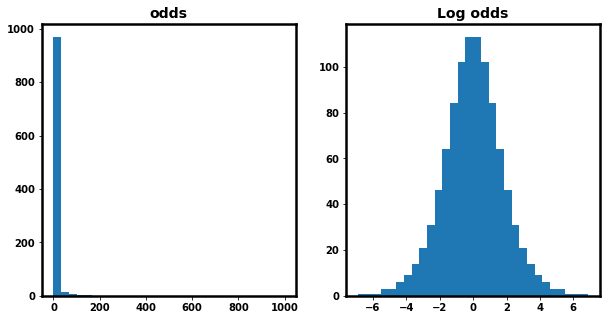

In [4]:
tf = tmh.TransformHelper()
tf.plot_odds()

$$
\begin{array}{llll}
\hat{p} \over {1- \hat{p}} & = &  { 1 \over { 1 + e^{-s} } } \over { 1 -  {1 \over { 1 + e^{-s} } } } \\
& = & { 1 \over { 1 + e^{-s} } } \over { {1 + e^{-s}  -1} \over {1 + e^{-s}} } \\
& = & 1 \over {e^{-s}} \\
& = & e^{s}
\end{array}
$$



So `LogisticRegression` is really just a `LinearRegression` with a transformed target

$$
\textrm{log}( {\hat{p} \over {1- \hat{p}}}) = \Theta^T \cdot x
$$

# Other transformations

## Centering

Transforming a feature to have mean $0$.

$$
\x^\ip_j = \x^\ip_j - \bar{\x}_j
$$

- low values now become negative
    - more clearly indicates deleterious effect than a low, positive number
    - example: Star Ratings for movies
- some algorithms (PCA) need centered data


## Bucketing/Binning

- Target may be linear in a feature only in broad ranges of the feature
    - income vs age
        - very young (below working age) all income is identical (0)
        - very old (above retirement) - no job related income
    - Latitude/Longitude
        - small changes matter MUCH less than big changes
        
- Converts numerical feature 
    - into categorical $\mathbf{Is \; bucket \; 1}, \mathbf{Is \; bucket \; 2}, \ldots$
    - ordinal: replace value with center value of bin

Bucket size choices:
- Equal spaced buckets
- Equal quantile buckets

**Lesson** Don't fit a square peg (non-linear response) into a round hole (linear model)

## Outliers

Pull in extreme values to reduce their influence on the fit.

- Clipping, Winsorization

In [9]:
print("Done")

Done
